In [1]:
import os
import os.path
import glob
import json
from tqdm import tqdm
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

In [4]:
# read the attributes
with open(os.path.join('dataset', 'VisualGenom', 'attributes.json'), 'r') as f:
    attributes = json.load(f)
print(len(attributes))

108077


In [20]:
def show_every_attribute(id:int):
    attr_json = attributes[id]
    path_to_image = os.path.join('dataset', 'VisualGenom', 'VG_100K', f'{id+1}.jpg')
    path_to_image2 = os.path.join('dataset', 'VisualGenom', 'VG_100K_2', f'{id+1}.jpg')

    try:
        img = Image.open(path_to_image)
    except Exception as e:
        img = Image.open(path_to_image2)

    for attr in attr_json['attributes']:
        # draw bounding box for testing
        # attr_0 = attr_json['attributes'][0]

        # print(((attr_0['x'], attr_0['y']), (attr_0['x']+attr_0['w'], attr_0['y']+attr_0['h'])))
        draw = ImageDraw.Draw(img)
        draw.rectangle(((attr['x'], attr['y']), (attr['x']+attr['w'], attr['y']+attr['h'])))

    # print(attr_0['attributes'])

    return img

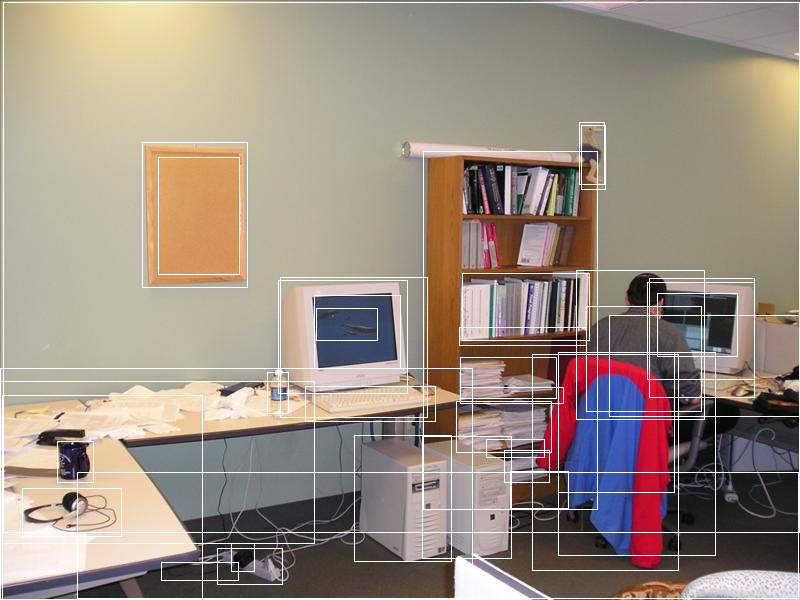

In [23]:
show_every_attribute(9)

In [25]:
# Get all of the unique objects:
unique_objects = set()
for attr in tqdm(attributes):
    for attr_attr in attr['attributes']:
        names = attr_attr['names']
        for name in names:
            # remove the number after the name
            name = name.split('.')[0]
            unique_objects.add(name)

100%|██████████| 108077/108077 [00:14<00:00, 7271.74it/s]


In [31]:
# extract all of the unique objects and save them to a folder
if False:
    unique_objects = set()
    for i, attr in tqdm(enumerate(attributes), total=len(attributes)):
        # open the main image
        path_to_image = os.path.join('dataset', 'VisualGenom', 'VG_100K', f'{i+1}.jpg')
        path_to_image2 = os.path.join('dataset', 'VisualGenom', 'VG_100K_2', f'{i+1}.jpg')

        try:
            img = Image.open(path_to_image)
        except Exception as e:
            img = Image.open(path_to_image2)

        # for each object
        for j, attr_attr in enumerate(attr['attributes']):
            names = attr_attr['names']

            # save the name of the object
            name = names[0].split('.')[0]
            unique_objects.add(name)

            # Cut out the object
            left = attr_attr['x']
            top = attr_attr['y']
            right = attr_attr['x'] + attr_attr['w']
            bottom = attr_attr['y'] + attr_attr['h']

            PADDING = 5  # add a padding of 5 pixels around each object to better get the context etc...
            left = max(0, left-PADDING)
            top = max(0, top-PADDING)
            right = min(img.size[0], right+PADDING)
            bottom = min(img.size[1], bottom+PADDING)

            object = img.crop((left, top, right, bottom))

            # save the object image
            path_to_object_folder = os.path.join('dataset', 'VisualGenom', 'objects', name.replace('"', '').replace('?', ''))
            os.makedirs(path_to_object_folder, exist_ok=True)
            object.save(os.path.join(path_to_object_folder, f'{i+1}_{j}.jpg'))
else:
    RuntimeError("TOO SLOW, NEED paralellization (would take 5 hours just to extract the objects")

In [23]:
from multiprocessing import Process
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor

unique_objects = set()

def extract_all_objects_from_image(image_id:int):
    try:
        attr = attributes[image_id]
        img_id = attr['image_id']

        path_to_image = os.path.join('dataset', 'VisualGenom', 'VG_100K', f'{img_id}.jpg')
        path_to_image2 = os.path.join('dataset', 'VisualGenom', 'VG_100K_2', f'{img_id}.jpg')

        # check whether the image exists
        if not os.path.exists(path_to_image) and not os.path.exists(path_to_image2):
            return False

        try:
            img = Image.open(path_to_image)
        except Exception as e:
            img = Image.open(path_to_image2)

        # for each object
        for j, attr_attr in enumerate(attr['attributes']):
            names = attr_attr['names']

            # save the name of the object
            name = names[0].split('.')[0]
            unique_objects.add(name)

            # Cut out the object
            left = attr_attr['x']
            top = attr_attr['y']
            right = attr_attr['x'] + attr_attr['w']
            bottom = attr_attr['y'] + attr_attr['h']

            PADDING = 5  # add a padding of 5 pixels around each object to better get the context etc...
            left = max(0, left-PADDING)
            top = max(0, top-PADDING)
            right = min(img.size[0], right+PADDING)
            bottom = min(img.size[1], bottom+PADDING)

            object = img.crop((left, top, right, bottom))

            # save the object image
            path_to_object_folder = os.path.join('dataset', 'VisualGenom', 'objects', name.replace('"', '').replace('?', '').replace(' ', ''))
            os.makedirs(path_to_object_folder, exist_ok=True)
            object.save(os.path.join(path_to_object_folder, f'{image_id+1}_{j}.jpg'))

        return True
    except Exception as e:
        return False

In [24]:
def run():
    all_of_the_images = list(range(len(attributes)))
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(extract_all_objects_from_image, all_of_the_images), total=len(attributes)))
    return results
results = run()

100%|██████████| 108077/108077 [49:41<00:00, 36.25it/s] 


In [1]:
len([x for x in results if x == True]), len(results)

NameError: name 'results' is not defined

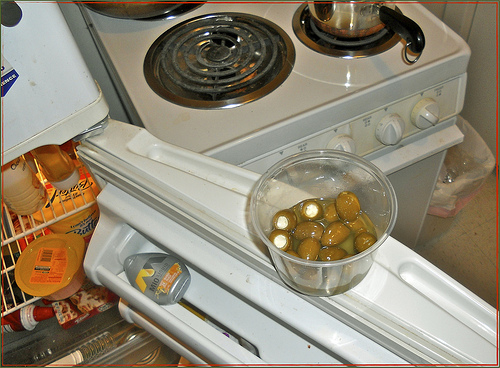

In [10]:
img_id = 34631

attr = attributes[img_id-1]
img_id = attr['image_id']

path_to_image = os.path.join('dataset', 'VisualGenom', 'VG_100K', f'{img_id}.jpg')
path_to_image2 = os.path.join('dataset', 'VisualGenom', 'VG_100K_2', f'{img_id}.jpg')

try:
    img = Image.open(path_to_image)
except Exception as e:
    img = Image.open(path_to_image2)

img